In [20]:
import os 
import numpy as np
import torch
from PIL import Image
from tqdm.auto import tqdm

In [40]:
from sphere_helper import drawSphere

In [51]:
# read sh variable 
with open('/pure/tu150/datasets/relight/face/ffhq/ffhq-train-light-anno.txt')as f:
    sh_raw = f.readlines()

with open('/pure/tu150/datasets/relight/face/ffhq/ffhq-valid-light-anno.txt')as f:
    sh_raw += f.readlines()

In [72]:
sh_dict = {}
for line in tqdm(sh_raw):
    line = line.strip()
    components = line.split(' ')
    name = int(components[0].split('.')[0])
    sh = np.array([float(x) for x in components[1:]])
    #sh = torch.tensor(sh).reshape(9, 3)
    #sh = sh.numpy()
    sh = sh.reshape(9, 3)
    sh_dict[name] = sh

  0%|          | 0/70000 [00:00<?, ?it/s]

In [73]:
sh_list = []
for key in range(70000):
    sh_list.append(sh_dict[key])

In [74]:
sh_list = np.array(sh_list)

In [75]:
# convert to gray scael
sh_grays = sh_list[:, :, 0] * 0.299 + sh_list[:, :, 1] * 0.587 + sh_list[:, :, 2] * 0.114

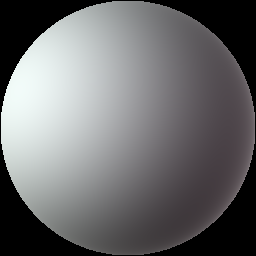

In [76]:
sphere = drawSphere(torch.tensor(sh_list[57]))
sphere = Image.fromarray((sphere.permute(1,2,0).numpy() * 255.0).astype(np.uint8))
display(sphere)

[12615 14528 12213 19321 13905 14050  3575 11037 13145   867]
ID:  12615


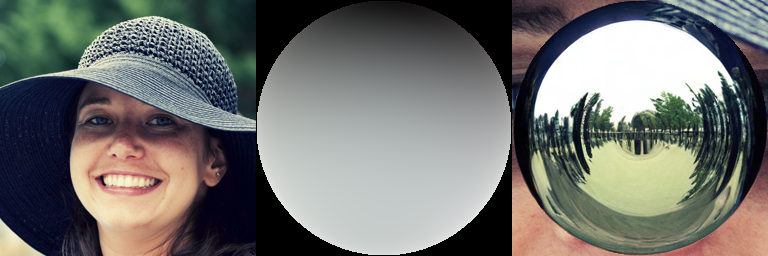

ID:  14528


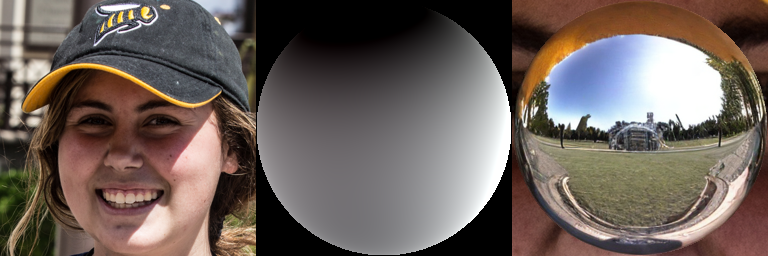

ID:  12213


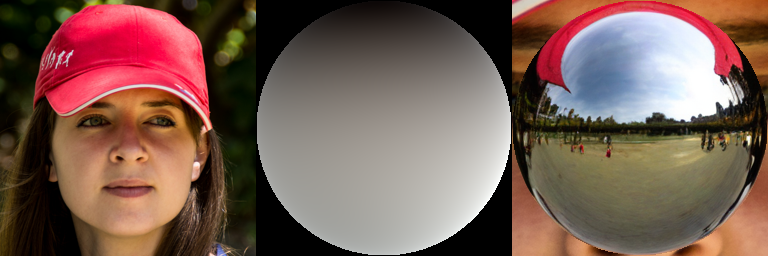

ID:  19321


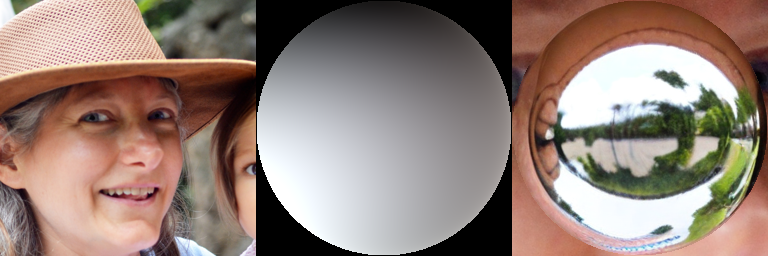

ID:  13905


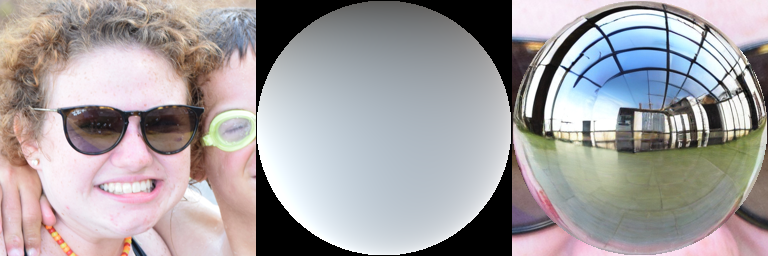

ID:  14050


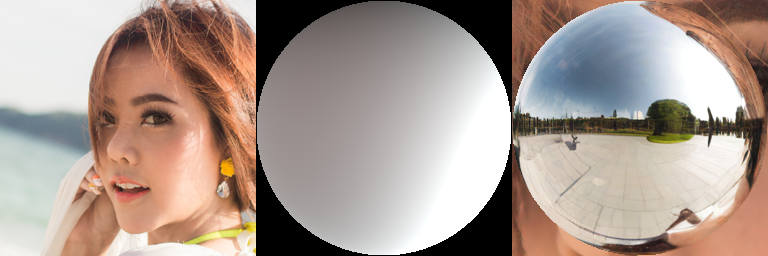

ID:  3575


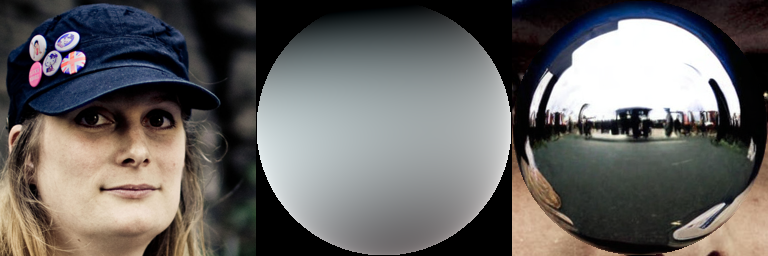

ID:  11037


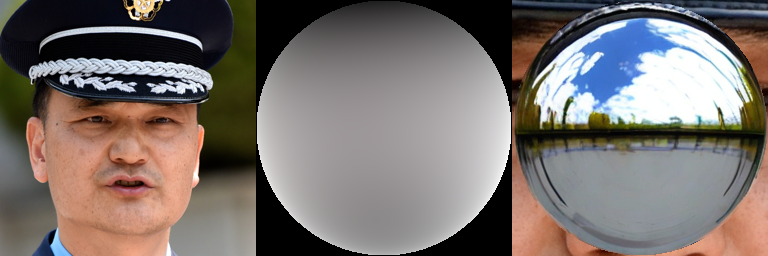

ID:  13145


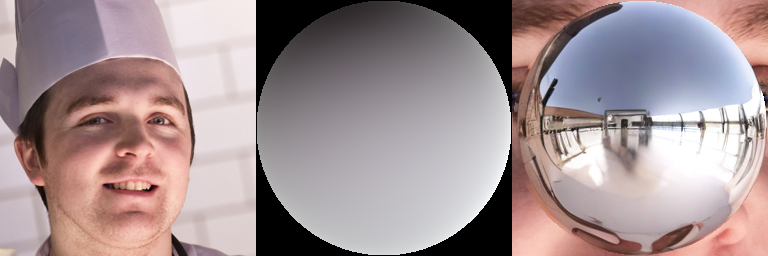

ID:  867


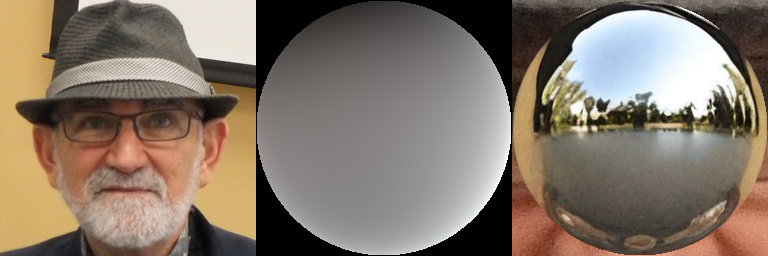

In [82]:
# look into y axis 
top_10_indices = np.argsort(sh_grays[:20000,2])[:10]
print(top_10_indices)
for i in top_10_indices:
    print("ID: ", i)
    sphere = drawSphere(torch.tensor(sh_list[i]))
    # convert sphere from torch tensor to PIL image and display
    sphere = Image.fromarray((sphere.permute(1,2,0).numpy() * 255.0).astype(np.uint8))
    # get source image 
    source = Image.open(f'/pure/tu150/datasets/relight/face/ffhq/images/{i // 1000 * 1000:05d}/{i:05d}.png').resize((256, 256))
    # get ball image
    ball = Image.open(f'/pure/tu150/datasets/relight/face/ffhq/diffusionlight/{i // 1000 * 1000:05d}/square/{i:05d}_ev-00.png').resize((256, 256))    

    # merge source and sphere and ball into one image
    merged = Image.new('RGB', (768, 256))
    merged.paste(source, (0, 0))
    merged.paste(sphere, (256, 0))
    merged.paste(ball, (512, 0))
    display(merged)

